## Access Radar Coralcoast Velocity Hourly Averaged Delayed QC data in Zarr
A jupyter notebook to show how to access and plot the AODN radar_CoralCoast_velocity_hourly_averaged_delayed_qc dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/f7b36a1c-0936-4da6-b47f-94ed538b367e).

In [1]:
dataset_name = "radar_CoralCoast_velocity_hourly_averaged_delayed_qc"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 240 packages in 26ms


✅ Local version 0.2.2 is up to date (remote: 0.2.2)


In [3]:
from DataQuery import GetAodn

# Understanding the Dataset

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 447 ms, sys: 60.7 ms, total: 508 ms
Wall time: 951 ms


## Plot time coverage

In [5]:
aodn_dataset.get_temporal_extent()

(Timestamp('2019-04-18 09:00:00'), Timestamp('2024-09-30 23:00:00.000003072'))

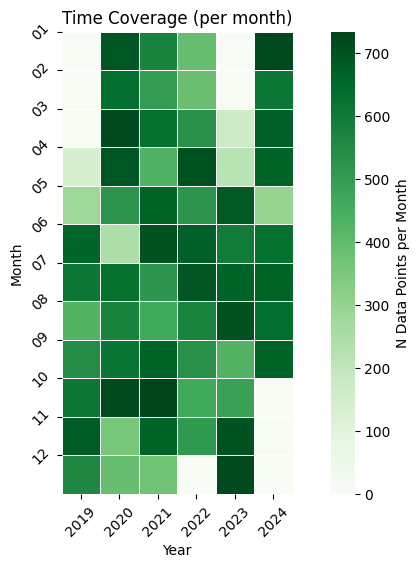

In [6]:
aodn_dataset.plot_time_coverage()

## Plot a gridded variable

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:791: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar


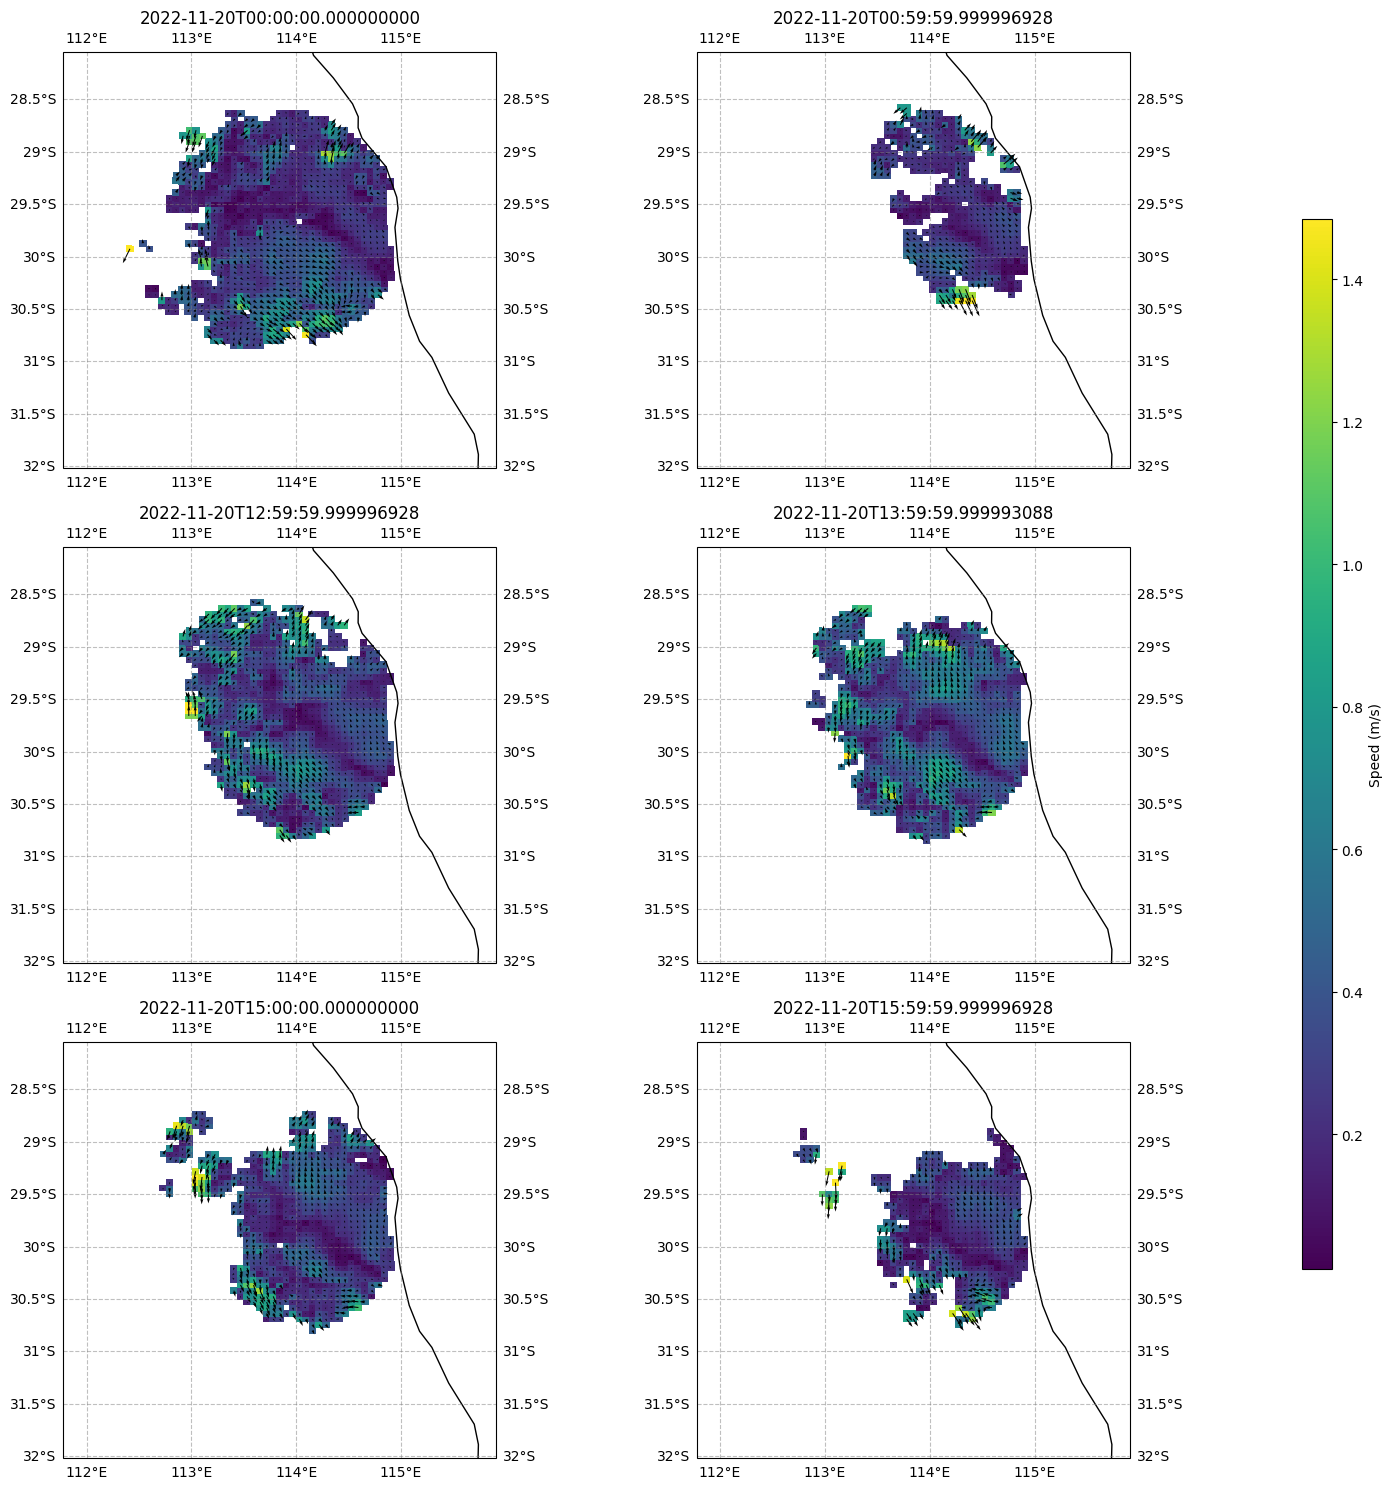

CPU times: user 4.05 s, sys: 2.39 s, total: 6.44 s
Wall time: 5.71 s


In [7]:
%%time
aodn_dataset.plot_radar_water_velocity_gridded(date_start='2022-11-20T00:00:00')

<Figure size 800x800 with 0 Axes>

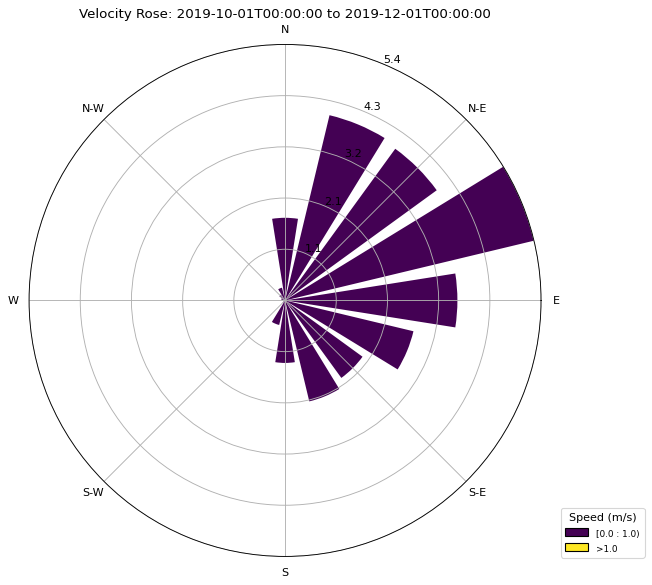

CPU times: user 427 ms, sys: 262 ms, total: 689 ms
Wall time: 848 ms


In [8]:
%%time
aodn_dataset.plot_radar_water_velocity_rose(date_start='2019-10-01T00:00:00', 
                                            date_end='2019-12-01T00:00:00')